In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling 
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices

<Figure size 720x540 with 0 Axes>

In [2]:
data = pd.read_csv("salary.csv")

In [3]:
data.shape

(8850, 15)

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data['income'] = data['income'].replace({'<=50K':0,'>50K':1})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8850 entries, 0 to 8849
Data columns (total 15 columns):
age                8850 non-null int64
workclass          8314 non-null object
fnlwgt             8850 non-null int64
education          8850 non-null object
educational-num    8850 non-null int64
marital-status     8850 non-null object
occupation         8313 non-null object
relationship       8850 non-null object
race               8850 non-null object
gender             8850 non-null object
capital-gain       8850 non-null int64
capital-loss       8850 non-null int64
hours-per-week     8850 non-null int64
native-country     8707 non-null object
income             8850 non-null int64
dtypes: int64(7), object(8)
memory usage: 1.0+ MB


In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8850.0,38.688249,13.773538,17.0,28.00,37.0,48.0,90.0
fnlwgt,8850.0,188338.749718,105329.617419,13769.0,115590.75,178007.0,237546.0,1490400.0
educational-num,8850.0,10.066893,2.569244,1.0,9.00,10.0,12.0,16.0
capital-gain,8850.0,1117.274915,7842.269726,0.0,0.00,0.0,0.0,99999.0
capital-loss,8850.0,87.896384,403.199152,0.0,0.00,0.0,0.0,3175.0
hours-per-week,8850.0,40.477401,12.416146,1.0,40.00,40.0,45.0,99.0
income,8850.0,0.233559,0.423119,0.0,0.00,0.0,0.0,1.0


In [13]:
data.isnull().any().sum()

3

In [14]:
# Encoding Categorical Features
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [15]:
data_num=data[numeric_var_names]
data_num.head(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0


In [16]:
my_df = data[cat_var_names]
my_df.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States


In [20]:
len(my_df['education'].value_counts())

6

In [21]:
my_df['education'].value_counts()

HighGrad            2883
CommunityCollege    2611
Bachelors           1460
dropout             1160
Masters              635
Doctorate            101
Name: education, dtype: int64

In [19]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [23]:
my_df.isnull().sum()

workclass         536
education           0
marital-status      0
occupation        537
relationship        0
race                0
gender              0
native-country    143
dtype: int64

In [25]:
my_df['marital-status'].value_counts()

Married       3971
NotMarried    3095
Separated     1480
Widowed        304
Name: marital-status, dtype: int64

In [24]:
my_df['marital-status'].mode()

0    Married
dtype: object

In [26]:
my_df['workclass'].mode().iloc[0]

'Private'

In [27]:
my_df['workclass'].value_counts()

Private             6047
Self-emp-not-inc     721
Local-gov            564
State-gov            392
Self-emp-inc         334
Federal-gov          252
Without-pay            3
Never-worked           1
Name: workclass, dtype: int64

In [28]:
for i in my_df[['workclass', 'education', 'marital-status', 'occupation',  'relationship', 'race', 'gender', 'native-country']]:
    my_df[i] = my_df[i].fillna((my_df[i].mode()).iloc[0])


C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
my_df.isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [30]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8850 entries, 0 to 8849
Data columns (total 7 columns):
age                8850 non-null int64
fnlwgt             8850 non-null int64
educational-num    8850 non-null int64
capital-gain       8850 non-null int64
capital-loss       8850 non-null int64
hours-per-week     8850 non-null int64
income             8850 non-null int64
dtypes: int64(7)
memory usage: 484.1 KB


In [32]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [33]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,8850.0,0.0,3.423910e+05,38.688249,37.0,13.773538,1.897103e+02,17.0,17.00,20.00,22.0,28.00,37.0,48.0,58.0,64.00,74.00,90.0
fnlwgt,8850.0,0.0,1.666798e+09,188338.749718,178007.0,105329.617419,1.109433e+10,13769.0,27470.23,39810.55,63102.6,115590.75,178007.0,237546.0,323829.4,376223.35,500020.47,1490400.0
educational-num,8850.0,0.0,8.909200e+04,10.066893,10.0,2.569244,6.601017e+00,1.0,3.00,5.00,7.0,9.00,10.0,12.0,13.0,14.00,16.00,16.0
capital-gain,8850.0,0.0,9.887883e+06,1117.274915,0.0,7842.269726,6.150119e+07,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,4931.00,15024.00,99999.0
capital-loss,8850.0,0.0,7.778830e+05,87.896384,0.0,403.199152,1.625696e+05,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,2001.51,3175.0
hours-per-week,8850.0,0.0,3.582250e+05,40.477401,40.0,12.416146,1.541607e+02,1.0,8.00,18.00,24.9,40.00,40.0,45.0,55.0,60.00,80.00,99.0
income,8850.0,0.0,2.067000e+03,0.233559,0.0,0.423119,1.790296e-01,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1.0,1.00,1.00,1.0


In [34]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.98))
    x = x.clip_lower(x.quantile(0.02))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
num_summary=data_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,8850.0,0.0,3.415390e+05,38.591977,37.0,13.475767,1.815963e+02,18.0,18.0,20.00,22.0,28.00,37.0,48.0,58.0,64.00,70.0,70.0
fnlwgt,8850.0,0.0,1.648332e+09,186252.152339,178007.0,96680.380126,9.347096e+09,30795.6,30795.6,39810.55,63102.6,115590.75,178007.0,237546.0,323829.4,376223.35,446899.0,446899.0
educational-num,8850.0,0.0,8.922600e+04,10.082034,10.0,2.470814,6.104921e+00,4.0,4.0,5.00,7.0,9.00,10.0,12.0,13.0,14.00,15.0,15.0
capital-gain,8850.0,0.0,5.172765e+06,584.493220,0.0,2300.668997,5.293078e+06,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,4931.00,13550.0,13550.0
capital-loss,8850.0,0.0,7.372040e+05,83.299887,0.0,379.077537,1.436998e+05,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,1902.0,1902.0
hours-per-week,8850.0,0.0,3.567150e+05,40.306780,40.0,11.488693,1.319901e+02,10.0,10.0,18.00,24.9,40.00,40.0,45.0,55.0,60.00,70.0,70.0
income,8850.0,0.0,2.067000e+03,0.233559,0.0,0.423119,1.790296e-01,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.0,1.00,1.0,1.0


In [36]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

num_summary=num_summary.apply(lambda x: Missing_imputation(x))

In [37]:
newdata = pd.concat([my_df,data_num],axis=1)

In [38]:
newdata.shape

(8850, 15)

In [100]:
newdata.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,Private,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,United-States,25,226802.0,7,0,0.0,40,0
1,Private,HighGrad,Married,Farming-fishing,Husband,White,Male,United-States,38,89814.0,9,0,0.0,50,0
2,Local-gov,CommunityCollege,Married,Protective-serv,Husband,White,Male,United-States,28,336951.0,12,0,0.0,40,1
3,Private,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,United-States,44,160323.0,10,7688,0.0,40,1
4,Private,CommunityCollege,NotMarried,Prof-specialty,Own-child,White,Female,United-States,18,103497.0,10,0,0.0,30,0


In [40]:
newdata1= newdata[newdata['income'] == 1]
newdata1['workclass'].value_counts()

Private             1332
Self-emp-not-inc     187
Self-emp-inc         183
Local-gov            161
State-gov            107
Federal-gov           97
Name: workclass, dtype: int64

In [41]:
newdata1= newdata[newdata['income'] == 0]
newdata1['workclass'].value_counts()

Private             5251
Self-emp-not-inc     534
Local-gov            403
State-gov            285
Federal-gov          155
Self-emp-inc         151
Without-pay            3
Never-worked           1
Name: workclass, dtype: int64

In [42]:
my_df.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

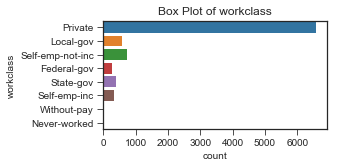

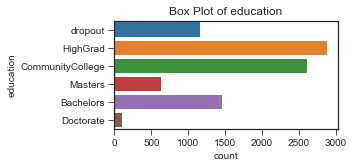

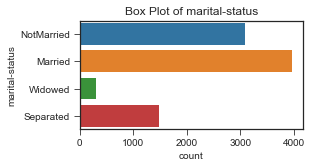

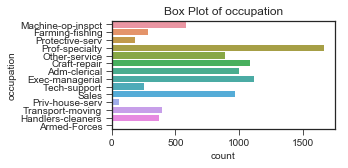

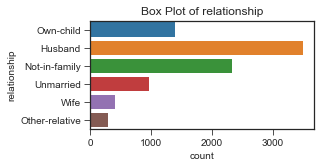

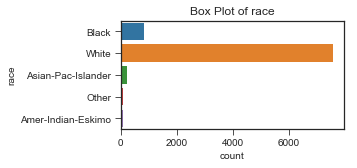

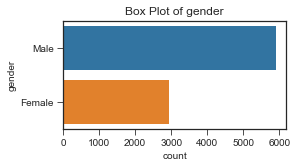

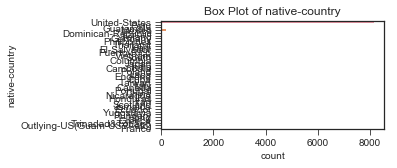

In [47]:
bp = PdfPages('CountPlots with count plot.pdf')
plt.style.use('seaborn-ticks')
for i in my_df.columns:
    fig,axes = plt.subplots(figsize=(4,2))
    sns.countplot(y=i, data=newdata)
    plt.title(str('Box Plot of ') + str(i))
    bp.savefig(fig)
bp.close()

In [104]:
newdata.groupby(['income']).mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
0,36.952234,187236.542911,9.643078,150.636591,53.666426,38.906973
1,44.228350,186279.688346,11.571359,2128.706821,187.066492,45.514272


In [105]:
newdata.groupby(['income']).median()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
0,34,178713.0,9,0,0.0,40
1,43,176716.0,12,0,0.0,40


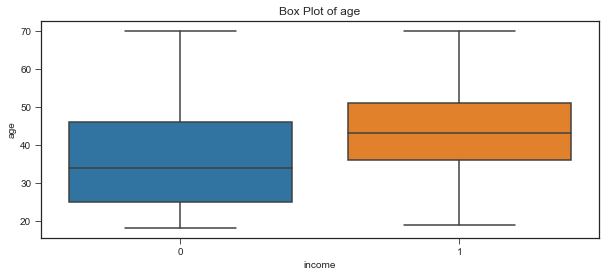

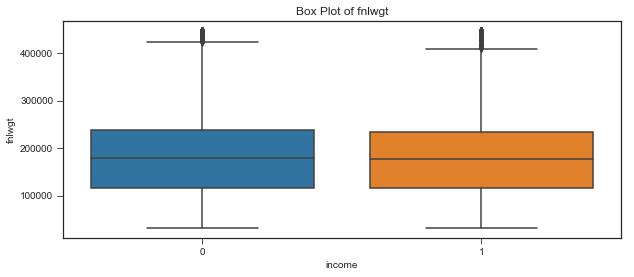

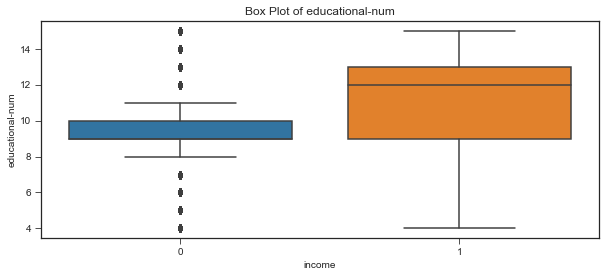

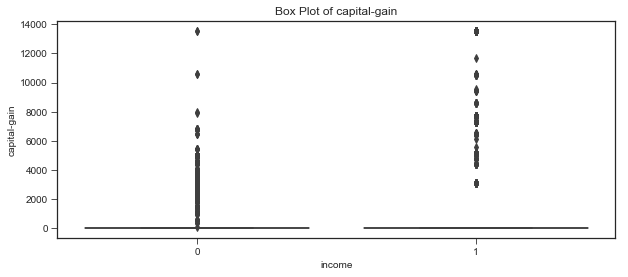

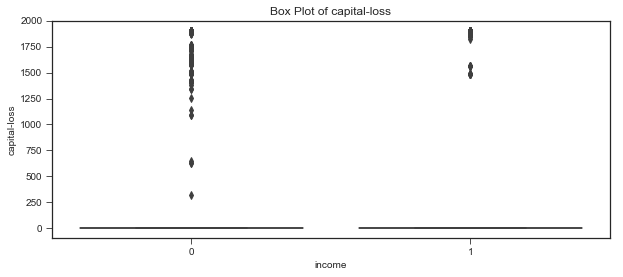

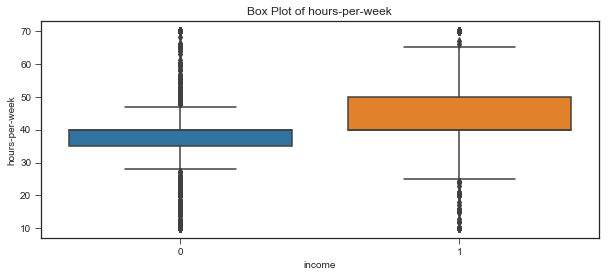

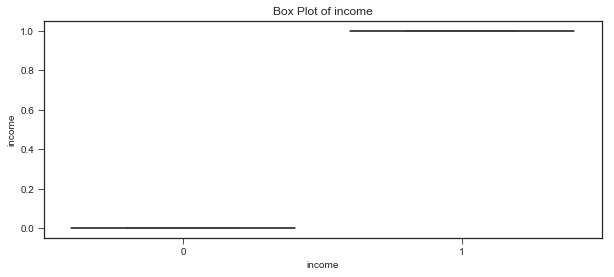

In [44]:
bp = PdfPages('BoxPlots with Attrition Split.pdf')

for num_variable in data_num.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='income', y=num_variable, data = newdata)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

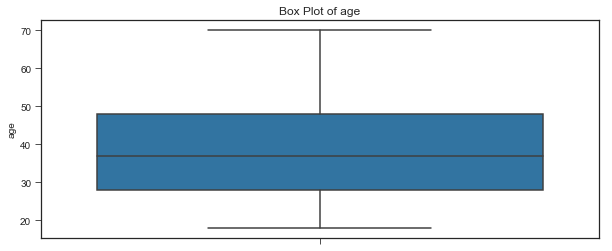

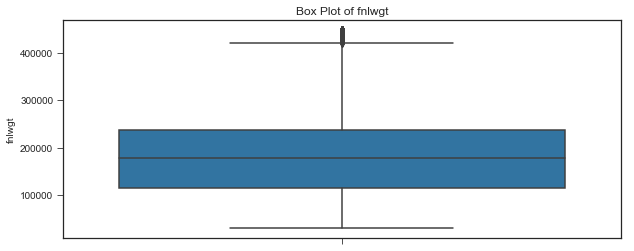

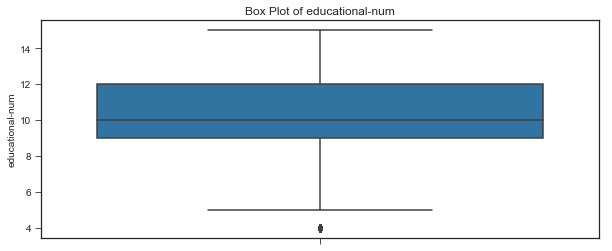

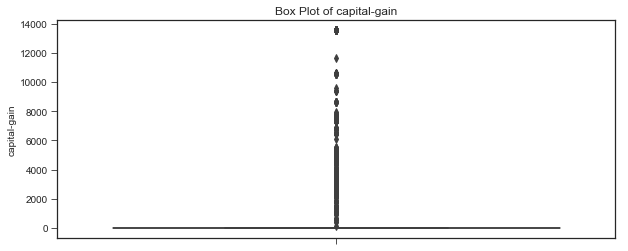

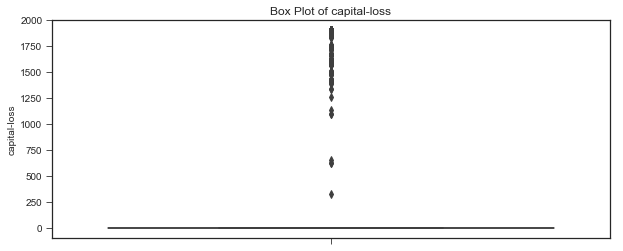

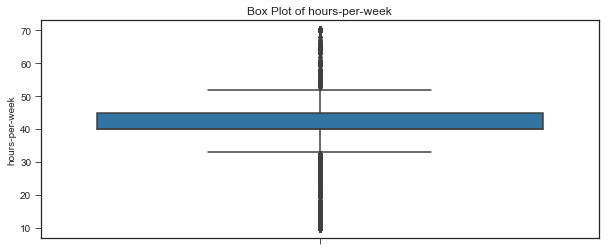

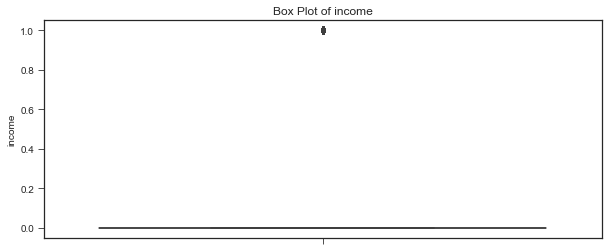

In [45]:
bp = PdfPages('BoxPlots with Total View.pdf')
for num_variable in data_num.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = newdata)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

In [138]:
my_df.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [53]:
import scipy.stats as stats
## Categorical Variable
chisq_df = pd.DataFrame()
for cat_variable in newdata[['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country','income']]:
    cross_tab = pd.crosstab(newdata[cat_variable],newdata['income'], margins=False)
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')
chisq_df.to_csv("chisq_df.csv")

         Variable ChiSquare       P-Value
0       workclass    268.25   3.59425e-54
1       education    1090.2  1.77361e-233
2  marital-status   1820.14             0
3      occupation   759.602  6.15462e-154
4    relationship    1883.8             0
5            race   88.5811   2.63551e-18
6          gender   369.567   2.32544e-82
7  native-country   98.4718   4.76895e-07
8          income   8844.41             0 



In [55]:
## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in data_num.columns:
    tstats = stats.ttest_ind(newdata[newdata['income']==1][num_variable],newdata[newdata['income']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

     Variable Name T-Statistic       P-Value
0              age     22.1691  5.05943e-106
1           fnlwgt    -0.38722      0.698603
2  educational-num     32.3593   3.2732e-217
3     capital-gain     34.2311  2.76967e-241
4     capital-loss     13.9104   1.57006e-43
5   hours-per-week     23.3031  1.27484e-116
6           income         inf             0


In [57]:
data_num.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


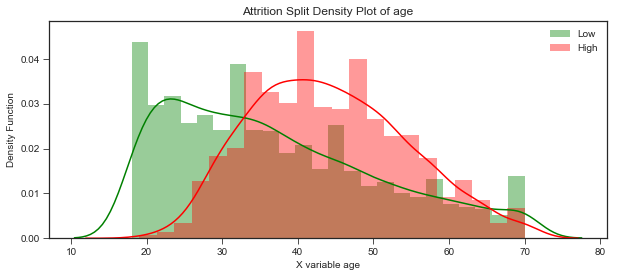

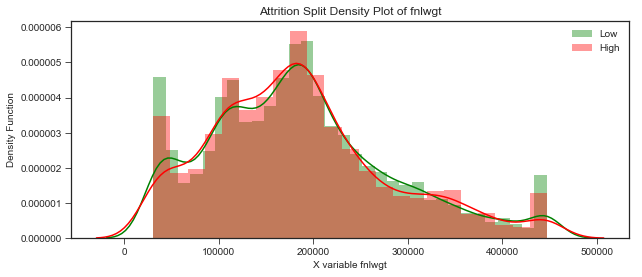

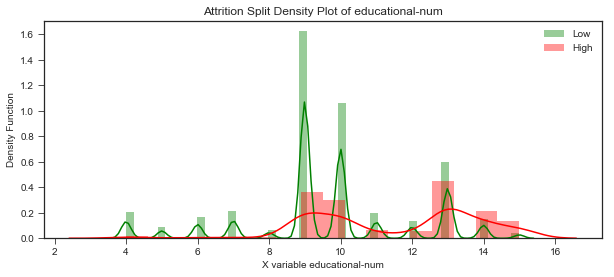

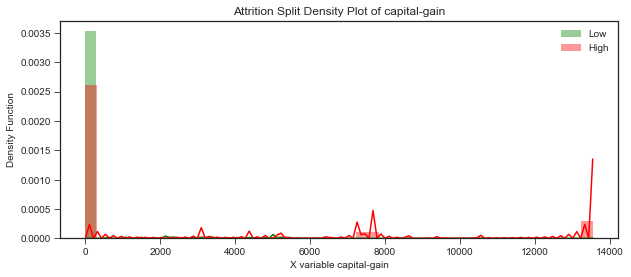

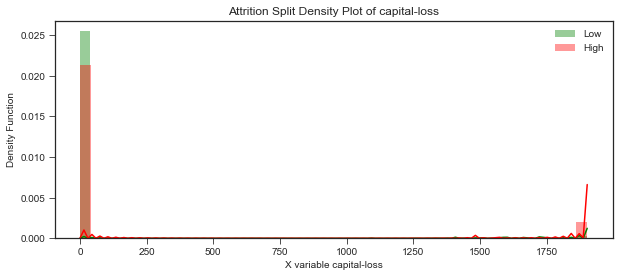

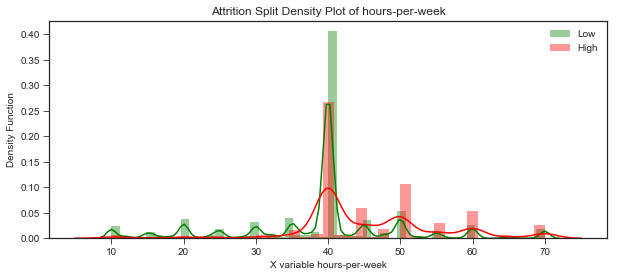

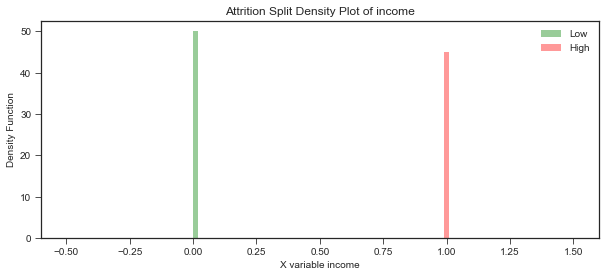

In [56]:
bp = PdfPages('Density Plots with Density Split.pdf')

for num_variable in data_num.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    #sns.distplot(hrdf[num_variable], kde=False, color='g', hist=True)
    sns.distplot(newdata[newdata['income']==0][num_variable], label='Low', color='g', hist=True, norm_hist=False)
    sns.distplot(newdata[newdata['income']==1][num_variable], label='High', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(num_variable) )
    plt.ylabel('Density Function')
    plt.title(str('Attrition Split Density Plot of ')+str(num_variable))
    plt.legend()
    bp.savefig(fig)

bp.close()

In [111]:
newdata.shape

(8850, 15)

In [28]:
newdata2=newdata

In [58]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df
for i in my_df.columns:
    newdata = create_dummies( newdata, i )

In [59]:
my_df.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [60]:
newdata.shape

(8850, 84)

In [61]:
newdata.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802.0,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814.0,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951.0,12,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323.0,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497.0,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [62]:
newdata.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_CommunityCollege',
       'education_Doctorate', 'education_HighGrad', 'education_Masters',
       'education_dropout', 'marital-status_NotMarried',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_O

In [116]:
data_num.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.091961,0.016468,0.126423,0.052429,0.088551,0.226010
fnlwgt,-0.091961,1.000000,-0.021080,-0.000617,-0.001078,-0.002531,-0.004094
educational-num,0.016468,-0.021080,1.000000,0.167869,0.085703,0.148529,0.326920
capital-gain,0.126423,-0.000617,0.167869,1.000000,-0.054610,0.112307,0.339907
capital-loss,0.052429,-0.001078,0.085703,-0.054610,1.000000,0.061665,0.146040
hours-per-week,0.088551,-0.002531,0.148529,0.112307,0.061665,1.000000,0.234763
income,0.226010,-0.004094,0.326920,0.339907,0.146040,0.234763,1.000000


In [63]:
num_list=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']   
hrdf_transform = newdata[num_list].copy()
squared = (hrdf_transform**2).add_suffix("_squared")
square_root = (hrdf_transform**0.5).add_suffix("_sqrt")
natural_log = np.log(hrdf_transform+1).add_suffix("_ln")
hrdf_transform = pd.concat([hrdf_transform, squared, square_root, natural_log], axis=1)
hrdf_transform.drop(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1, inplace=True)
hrdf_transform.head()

,age_squared,fnlwgt_squared,educational-num_squared,capital-gain_squared,capital-loss_squared,hours-per-week_squared,age_sqrt,fnlwgt_sqrt,educational-num_sqrt,capital-gain_sqrt,capital-loss_sqrt,hours-per-week_sqrt,age_ln,fnlwgt_ln,educational-num_ln,capital-gain_ln,capital-loss_ln,hours-per-week_ln
0,625,5.143915e+10,49,0,0,1600,5.000000,476.237336,2.645751,0.000000,0.0,6.324555,3.258097,12.331837,2.079442,0.000000,0.0,3.713572
1,1444,8.066555e+09,81,0,0,2500,6.164414,299.689840,3.000000,0.000000,0.0,7.071068,3.663562,11.405507,2.302585,0.000000,0.0,3.931826
2,784,1.135360e+11,144,0,0,1600,5.291503,580.474806,3.464102,0.000000,0.0,6.324555,3.367296,12.727696,2.564949,0.000000,0.0,3.713572
3,1936,2.570346e+10,100,59105344,0,1600,6.633250,400.403546,3.162278,87.681241,0.0,6.324555,3.806662,11.984952,2.397895,8.947546,0.0,3.713572
4,324,1.071163e+10,100,0,0,900,4.242641,321.709496,3.162278,0.000000,0.0,5.477226,2.944439,11.547308,2.397895,0.000000,0.0,3.433987


In [65]:
newdata.shape

(8850, 84)

In [119]:
hrdf_transform.shape

(8850, 18)

In [66]:
newdata2= pd.concat([newdata,hrdf_transform],axis=1)

In [67]:
newdata2.shape

(8850, 102)

In [68]:
y= newdata2['income']

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [70]:
std_scale = preprocessing.StandardScaler().fit(newdata2.drop('income', axis=1))

In [71]:
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
X = std_scale.transform(newdata2.drop('income', axis=1))

In [73]:
X.shape

(8850, 101)

In [74]:
y.shape

(8850,)

In [75]:
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [76]:
train_X, test_X, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y,random_state = 100)

In [79]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [97]:
clf_gini = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=10, min_samples_leaf=2) 
clf_gini.fit(train_X, y_train) 
train_predicted_prob = pd.DataFrame(clf_gini.predict_proba(train_X))
train_predicted_prob.columns = ['prob0','prob1']
train_actual = y_train
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob0','prob1']
train_predict.head()

,actual,prob0,prob1
0,0,0.976744,0.023256
1,0,0.667969,0.332031
2,0,0.667969,0.332031
3,0,0.667969,0.332031
4,0,0.631579,0.368421


In [98]:
test_predicted_prob = pd.DataFrame(clf_gini.predict_proba(test_X))
test_predicted_prob.columns = ['prob0','prob1']
test_actual = y_test
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob0','prob1']
test_predict.head()

,actual,prob0,prob1
0,0,0.667969,0.332031
1,0,1.000000,0.000000
2,0,0.667969,0.332031
3,1,1.000000,0.000000
4,1,0.000000,1.000000


In [99]:
test_predicted_prob = pd.DataFrame(clf_gini.predict(test_X))
test_predicted_prob.columns = ['pred']
test_actual = y_test
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','pred']
test_predict.head()

,actual,pred
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1


In [100]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(test_predict.actual, test_predict.pred))

The overall accuracy score for the Train Data is :  0.839924670433145


In [101]:
print("Report : ", classification_report(test_predict.actual, test_predict.pred))

Report :                precision    recall  f1-score   support

           0       0.87      0.92      0.90      2035
           1       0.69      0.57      0.62       620

    accuracy                           0.84      2655
   macro avg       0.78      0.74      0.76      2655
weighted avg       0.83      0.84      0.83      2655



In [86]:
confusion_matrix(test_predict.actual, test_predict.pred)

array([[1914,  121],
       [ 277,  343]], dtype=int64)

In [102]:
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Function importing Dataset 
#def importdata(): 
#    balance_data = pd.read_csv("filename")       
#    # Printing the dataswet shape 
#    return balance_data 
  
      
        
def splitdataset(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y,random_state = 100)       
    return X_train, X_test, y_train, y_test 
    
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=10, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 10, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  
# Driver code 
def main(): 
      
    # Building Phase 
    #data = importdata() 
    X_train, X_test, y_train, y_test = splitdataset(X,y)
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 

Results Using Gini Index:
Predicted values:
[0 0 0 ... 1 0 0]
Confusion Matrix:  [[1897  138]
 [ 261  359]]
Accuracy :  84.97175141242937
Report :                precision    recall  f1-score   support

           0       0.88      0.93      0.90      2035
           1       0.72      0.58      0.64       620

    accuracy                           0.85      2655
   macro avg       0.80      0.76      0.77      2655
weighted avg       0.84      0.85      0.84      2655

Results Using Entropy:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[1905  130]
 [ 266  354]]
Accuracy :  85.08474576271186
Report :                precision    recall  f1-score   support

           0       0.88      0.94      0.91      2035
           1       0.73      0.57      0.64       620

    accuracy                           0.85      2655
   macro avg       0.80      0.75      0.77      2655
weighted avg       0.84      0.85      0.84      2655

